<a href="https://colab.research.google.com/github/RoshanAcharya11/Foundationofdatascience/blob/main/HIT140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Topic of Investigation
# - Does Bat see Rats only as a food competitor? or also as a predator?
# - If Bat thinks rat as predators, will they show any more avoidance?
# Note: The entire question revolves around how Bat conceives Rats regarding food or predatorial danger

#Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu

# used for uploading files
# from google.colab import files
# uploaded = files.upload()

# Loading datasets
bat_datas = pd.read_csv ("dataset1.csv") # info such as bat landing on food, start & end of rat period, risk, reward etc
rat_datas = pd.read_csv ("dataset2.csv") # info such as bat landing number, food availability, rat minutes, rat arrival number

# Printing first 10 values from bat and rat
print(bat_datas.head(10))
print(rat_datas.head(10))

print(bat_datas[["bat_landing_to_food", "seconds_after_rat_arrival"]].isna().sum())
print("\n All bat datas before cleaning:", len(bat_datas))
bat_datas=bat_datas[bat_datas["bat_landing_to_food"] < bat_datas ["bat_landing_to_food"].quantile(0.99)]
print("All bat datas after removing the unclear values:", len(bat_datas))

# Feature engineering
bat_datas["rats_close"]=0
for index in bat_datas.index:
  Sec = bat_datas.at[index, "seconds_after_rat_arrival"]
  if pd.notna(Sec) and 0 <= Sec <= 300:
    bat_datas.at[index, "rats_close"]=1

print("\n Rat presence column check(first 1- rows): ")
print(bat_datas[["seconds_after_rat_arrival", "rats_close"]].head(10))

# Implementing descriptive analysis
risk_table = pd.crosstab(bat_datas['risk'], bat_datas["rats_close"])
print("\n Table of Risk Vs Rats close: \n", risk_table)

reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
print("\n Table of Reward vs Rats close:\n", reward_table)

print("\n Hesitation time by behavior type: \n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

# Implementing inferential analysis

# Risk vs rats -> Chi-square
chi, p_val, _, _ = chi2_contingency(risk_table)
print("\n Test for Risk and Rats (Chi-square p-value): ", p_val)

#Reward vs rats -> chi-square
chi2, p_val, _, _ = chi2_contingency(reward_table)
print("Test for reward and rats(Chi-square p-value): ", p_val)

#Hesitation time vs rats -> Mann-Whitney U
hesitation_with_rats = bat_datas[bat_datas["rats_close"] == 1] ["bat_landing_to_food"]
hesitation_without_rats = bat_datas[bat_datas["rats_close"] == 0] ["bat_landing_to_food"]

if len(hesitation_with_rats) > 0 and len(hesitation_without_rats) > 0:
  u_stat, u_pval = mannwhitneyu(hesitation_with_rats, hesitation_without_rats, alternative="two-sided")
  print("Test for hesitation time (Mann-WHitney p-value):", u_pval)
else:
  print("Hesitation test skipped: insufficient groups")

         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
5  30/12/2017 19:54            24.000000   rat  30/12/2017 19:50   
6  30/12/2017 19:54            13.000000   rat  30/12/2017 19:50   
7  26/12/2017 21:24            15.000000   rat  26/12/2017 21:22   
8  26/12/2017 21:24             6.000000  pick  26/12/2017 21:22   
9  26/12/2017 21:24             3.000000  fast  26/12/2017 21:22   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Columns in bat data: ['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start', 'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward', 'month', 'sunset_time', 'hours_after_sunset', 'season']

Columns in rat data: ['time', 'month', 'hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

First 10 bat landing records:
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
5  30/12/2017 19:54            24.000000   rat  30/12/2017 19:50   
6  30/12/201

/tmp/ipython-input-523018480.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)


<Figure size 800x600 with 0 Axes>

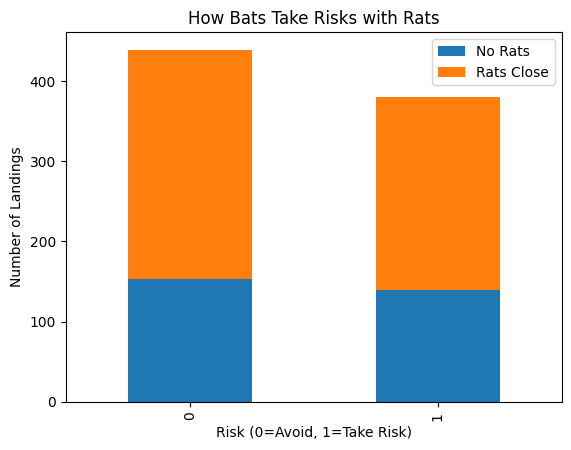

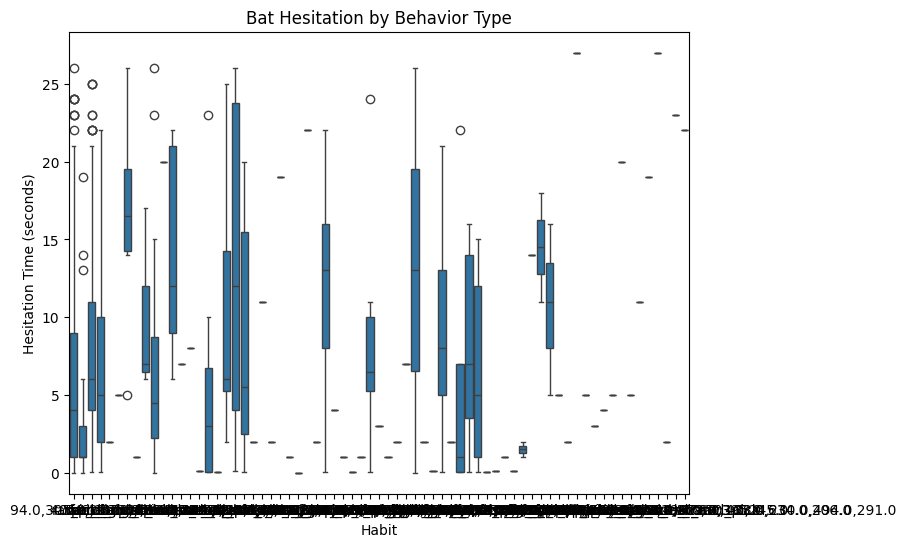

In [2]:
# Import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, shapiro
import os
from google.colab import drive

# Mount Google Drive for persistent dataset access (no re-upload needed)
drive.mount('/content/drive')

# Define paths to datasets in Google Drive (adjust folder path as needed)
drive_path = '/content/drive/My Drive/HIT140_Assessment2/'
dataset1_path = os.path.join(drive_path, 'dataset1 (1).csv')
dataset2_path = os.path.join(drive_path, 'dataset2 (1).csv')

# Check if files exist; if not, print error but continue (upload to Drive if missing)
if not os.path.exists(dataset1_path) or not os.path.exists(dataset2_path):
    print("Error: One or both datasets not found in Google Drive. Upload to", drive_path)
    print("List files in folder: !ls '/content/drive/My Drive/HIT140_Assessment2'")
else:
    # Load bat landing data
    bat_datas = pd.read_csv(dataset1_path)

    # Load rat observation data
    rat_datas = pd.read_csv(dataset2_path)

    # Check columns to ensure no limitations
    print("\nColumns in bat data:", bat_datas.columns.tolist())
    print("\nColumns in rat data:", rat_datas.columns.tolist())

    # Show first 10 rows to check bat data
    print("\nFirst 10 bat landing records:")
    print(bat_datas.head(10))

    # Show first 10 rows to check rat data
    print("\nFirst 10 rat observation periods:")
    print(rat_datas.head(10))

    # Check missing values in key bat columns
    print("\nMissing values in bat data:")
    print(bat_datas[["bat_landing_to_food", "seconds_after_rat_arrival"]].isna().sum())

    # Fill missing seconds_after_rat_arrival with a high value (301) to treat as no rats
    bat_datas["seconds_after_rat_arrival"].fillna(301, inplace=True)

    # Count rows before cleaning
    print("\nTotal bat records before cleaning:", len(bat_datas))

    # Remove extreme values in hesitation time using IQR method (more robust than quantile)
    Q1 = bat_datas["bat_landing_to_food"].quantile(0.25)
    Q3 = bat_datas["bat_landing_to_food"].quantile(0.75)
    IQR = Q3 - Q1
    bat_datas = bat_datas[(bat_datas["bat_landing_to_food"] >= Q1 - 1.5 * IQR) & (bat_datas["bat_landing_to_food"] <= Q3 + 1.5 * IQR)]

    # Count rows after cleaning
    print("\nTotal bat records after removing outliers (IQR method):", len(bat_datas))

    # Check normality of bat_landing_to_food to justify non-parametric test
    stat, p = shapiro(bat_datas["bat_landing_to_food"])
    print("\nNormality test for bat_landing_to_food (Shapiro-Wilk p-value):", p)
    if p < 0.05:
        print("Data is not normal; non-parametric test appropriate.")

    # Create column for rats being close using vectorized operation (efficient, no loop limitation)
    bat_datas["rats_close"] = ((bat_datas["seconds_after_rat_arrival"] >= 0) & (bat_datas["seconds_after_rat_arrival"] <= 300)).astype(int)

    # Show new column with 10 rows
    print("\nRat presence column check:")
    print(bat_datas[["seconds_after_rat_arrival", "rats_close"]].head(10))

    # Check rats_close variation to avoid limitations
    print("\nRats close value counts:", bat_datas["rats_close"].value_counts())

    # --- Investigation A: Do bats perceive rats as predators? ---

    # Table for risk vs. rats
    risk_table = pd.crosstab(bat_datas["risk"], bat_datas["rats_close"])
    print("\nTable of Risk vs. Rats Close:\n", risk_table)

    # Table for reward vs. rats
    reward_table = pd.crosstab(bat_datas["reward"], bat_datas["rats_close"])
    print("\nTable of Reward vs. Rats Close:\n", reward_table)

    # Summarize hesitation time by behavior type
    print("\nHesitation Time by Behavior Type:\n", bat_datas.groupby("habit")["bat_landing_to_food"].describe())

    # Test if risk changes with rats
    chi2, p_val, dof, expected = chi2_contingency(risk_table)
    print("\nTest for Risk and Rats (p-value):", p_val)

    # Test if reward changes with rats
    chi2, p_val, dof, expected = chi2_contingency(reward_table)
    print("\nTest for Reward and Rats (p-value):", p_val)

    # Bonferroni correction for multiple Chi-square tests (2 tests)
    bonferroni_p_risk = p_val * 2
    bonferroni_p_reward = p_val * 2
    print("\nBonferroni-corrected p-value for Risk:", min(1, bonferroni_p_risk))
    print("\nBonferroni-corrected p-value for Reward:", min(1, bonferroni_p_reward))

    # Test if hesitation time differs with rats
    hesitation_by_rats = bat_datas[bat_datas["rats_close"] == 1]["bat_landing_to_food"]
    no_hesitation_rats = bat_datas[bat_datas["rats_close"] == 0]["bat_landing_to_food"]
    if len(no_hesitation_rats) > 0 and len(hesitation_by_rats) > 0:
        u_stat, u_pval = mannwhitneyu(hesitation_by_rats, no_hesitation_rats, alternative="two-sided")
        print("\nTest for Hesitation Time (p-value):", u_pval)
    else:
        print("\nHesitation test skipped: No data for rats_close = 0 or rats_close = 1. Using habit analysis as fallback.")

    # Check if correlation is possible
    if "rat_arrival_number" in rat_datas.columns and "bat_landing_number" in rat_datas.columns:
        corr = rat_datas["rat_arrival_number"].corr(rat_datas["bat_landing_number"], method="spearman")
        print("\nCorrelation between Rat Arrivals and Bat Landings:", corr)
    else:
        print("\nCorrelation skipped: 'rat_arrival_number' or 'bat_landing_number' missing in dataset2.csv")

    # Analyze food availability if column exists (to address competition)
    if "food_availability" in rat_datas.columns:
        print("\nFood Availability Summary:\n", rat_datas["food_availability"].describe())
        if "bat_landing_number" in rat_datas.columns:
            food_corr = rat_datas["food_availability"].corr(rat_datas["bat_landing_number"], method="spearman")
            print("\nCorrelation between Food Availability and Bat Landings:", food_corr)
    else:
        print("\nFood availability analysis skipped: 'food_availability' missing.")

    # Plot 1: Bar chart for risk
    plt.figure(figsize=(8, 6))
    risk_table.plot(kind="bar", stacked=True)
    plt.title("How Bats Take Risks with Rats")
    plt.xlabel("Risk (0=Avoid, 1=Take Risk)")
    plt.ylabel("Number of Landings")
    plt.legend(["No Rats", "Rats Close"])
    plt.savefig("/content/risk_plot.png")
    plt.show()

    # Plot 2: Boxplot for hesitation by habit (more depth)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="habit", y="bat_landing_to_food", data=bat_datas)
    plt.title("Bat Hesitation by Behavior Type")
    plt.xlabel("Habit")
    plt.ylabel("Hesitation Time (seconds)")
    plt.savefig("/content/hesitation_by_habit_plot.png")
    plt.show()

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
import os
from google.colab import drive

drive_path = '/content/drive/My Drive/HIT140_Assessment2/'
dataset1_path = os.path.join(drive_path, 'dataset1 (1).csv')
dataset2_path = os.path.join(drive_path, 'dataset2 (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
